<h1 style="font-size: 40px; margin-bottom: 0px;">7.2 ChIP-seq peak calling</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 700px;"></hr>

Let's import the packages that we'll need:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import your .xls files into their own pandas DataFrames.

Since the files themselves have extra comments that we don't want to import, we can exclude comments by using the <code>comment</code> parameter, and specifying the starting value for those cells that are comments. In our case, the comment cells are denoted with a <code>&num;</code>.

```
ctrl = pd.read_csv("macs2/10M_ctrl_peaks.xls", delimiter='\t', comment='#')
```

In [5]:
ctrl = pd.read_csv("macs2/10M_ctrl_peaks.xls", delimiter='\t', comment='#')

As usual, let's take a look to make sure things imported properly by looking at just the first 5 rows of our DataFrame.

In [6]:
ctrl.head().style

,chr,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
0,chr1,10010,10233,224,10062,33,47.164600,21.739100,41.201300,10M_ctrl_peak_1
1,chr1,10390,10458,69,10424,13,14.602300,8.924590,9.883300,10M_ctrl_peak_2
2,chr1,564495,564572,78,564549,57,18.612400,4.009540,13.713100,10M_ctrl_peak_3
3,chr1,564689,564829,141,564802,50,13.524700,3.369090,8.853220,10M_ctrl_peak_4
4,chr1,564902,564970,69,564944,53,14.759400,3.473450,10.033500,10M_ctrl_peak_5


<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #1: Import the remaining .xls files</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 850px;"></hr>

For this exercise, import the remaining .xls files that correspond to your 10M_taz_1 and 10M_taz_2 files. And take a look at the first five rows to double check that they've imported properly.

In [7]:
taz_1 = pd.read_csv("macs2/10M_taz_1_peaks.xls", delimiter='\t', comment='#')

In [8]:
taz_1.head().style

,chr,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
0,chr1,960117,960354,238,960224,16,17.881900,10.236800,13.587900,10M_taz_1_peak_1
1,chr1,1200310,1200494,185,1200445,12,13.121100,8.237770,9.040820,10M_taz_1_peak_2
2,chr1,1296015,1296286,272,1296163,14,16.208900,9.663280,11.979200,10M_taz_1_peak_3
3,chr1,1310545,1310710,166,1310679,7,6.880840,5.153750,3.250230,10M_taz_1_peak_4
4,chr1,1617792,1617964,173,1617919,7,4.929440,3.961240,1.578600,10M_taz_1_peak_5


In [9]:
taz_2 = pd.read_csv("macs2/10M_taz_2_peaks.xls", delimiter='\t', comment='#')

In [10]:
taz_2.head().style

,chr,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
0,chr1,960071,960340,270,960190,18,19.146600,10.490600,14.832300,10M_taz_2_peak_1
1,chr1,1200204,1200501,298,1200378,10,7.942810,5.465390,4.214470,10M_taz_2_peak_2
2,chr1,1295982,1296211,230,1296132,14,15.660100,9.359180,11.472500,10M_taz_2_peak_3
3,chr1,1992808,1993144,337,1992934,20,20.012900,10.433900,15.670300,10M_taz_2_peak_4
4,chr1,6784654,6784910,257,6784764,15,16.779000,9.810590,12.550400,10M_taz_2_peak_5


<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #2: Filter dataset</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 850px;"></hr>

Now let's filter and sort our peak DataFrames to get just the most enriched peaks.

In [14]:
ctrl_fc_filtered = ctrl.loc[ctrl['fold_enrichment'] > 10]
ctrl_fc_filtered_sort = ctrl_fc_filtered.sort_values(by='fold_enrichment', ascending=False)
ctrl_fc_filtered_sort.head()

,chr,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
1346,chr9,70076703,70076801,99,70076750,80,132.672,47.1177,123.180,10M_ctrl_peak_1347
1347,chr9,70327439,70327541,103,70327490,76,123.016,43.9498,115.208,10M_ctrl_peak_1348
810,chr2,149639296,149639415,120,149639340,68,108.038,39.9190,100.603,10M_ctrl_peak_811
925,chr3,196625619,196625774,156,196625716,92,132.141,39.3568,123.180,10M_ctrl_peak_926
1293,chr9,42819078,42819176,99,42819132,76,114.818,39.2157,107.219,10M_ctrl_peak_1294


In [16]:
taz_1_fc_filtered = taz_1.loc[taz_1['fold_enrichment'] > 10]
taz_1_fc_filtered_sort = taz_1_fc_filtered.sort_values(by='fold_enrichment', ascending=False)
taz_1_fc_filtered_sort.head()

,chr,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
30,chr1,19378871,19379364,494,19379131,96,177.232,62.4892,170.289,10M_taz_1_peak_31
2683,chr3,76546744,76547274,531,76547015,75,130.083,48.4127,123.583,10M_taz_1_peak_2684
277,chr1,161369269,161369922,654,161369601,110,160.424,43.8847,153.591,10M_taz_1_peak_278
2852,chr3,197216821,197217437,617,197217088,88,133.934,42.9204,127.374,10M_taz_1_peak_2853
1911,chr19,1383199,1383934,736,1383513,163,215.209,40.4069,208.115,10M_taz_1_peak_1912


In [17]:
taz_2_fc_filtered = taz_2.loc[taz_2['fold_enrichment'] > 10]
taz_2_fc_filtered_sort = taz_2_fc_filtered.sort_values(by='fold_enrichment', ascending=False)
taz_2_fc_filtered_sort.head()

,chr,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
2195,chr3,76546759,76547306,548,76547026,88,154.845,54.8747,148.330,10M_taz_2_peak_2196
26,chr1,19378914,19379469,556,19379133,84,147.400,53.0354,140.957,10M_taz_2_peak_27
1144,chr14,62221709,62222529,821,62222191,264,356.105,47.6877,346.613,10M_taz_2_peak_1145
3457,chr9,137029377,137030049,673,137029712,136,189.728,43.3126,182.832,10M_taz_2_peak_3458
2311,chr3,197216853,197217361,509,197217071,78,114.727,37.9529,108.819,10M_taz_2_peak_2312


Output the rows corresponding to the top 20 highest fold-enrichment peaks. 

In [18]:
taz_1_fc_filtered_sort.head(20)

,chr,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
30,chr1,19378871,19379364,494,19379131,96,177.2320,62.4892,170.2890,10M_taz_1_peak_31
2683,chr3,76546744,76547274,531,76547015,75,130.0830,48.4127,123.5830,10M_taz_1_peak_2684
277,chr1,161369269,161369922,654,161369601,110,160.4240,43.8847,153.5910,10M_taz_1_peak_278
2852,chr3,197216821,197217437,617,197217088,88,133.9340,42.9204,127.3740,10M_taz_1_peak_2853
1911,chr19,1383199,1383934,736,1383513,163,215.2090,40.4069,208.1150,10M_taz_1_peak_1912
2664,chr3,58546431,58546910,480,58546687,59,96.4471,38.0205,90.6040,10M_taz_1_peak_2665
1346,chr14,62221781,62222474,694,62222163,225,277.7890,37.0622,270.3770,10M_taz_1_peak_1347
1687,chr17,37309773,37311123,1351,37310088,115,152.9580,36.8580,146.2190,10M_taz_1_peak_1688
1285,chr14,21151776,21152496,721,21152127,91,125.7770,36.3729,119.3430,10M_taz_1_peak_1286
1767,chr17,73030385,73031437,1053,73030628,126,162.7330,35.6728,155.8760,10M_taz_1_peak_1768


In [19]:
taz_2_fc_filtered_sort.head(20)

,chr,start,end,length,abs_summit,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
2195,chr3,76546759,76547306,548,76547026,88,154.8450,54.8747,148.3300,10M_taz_2_peak_2196
26,chr1,19378914,19379469,556,19379133,84,147.4000,53.0354,140.9570,10M_taz_2_peak_27
1144,chr14,62221709,62222529,821,62222191,264,356.1050,47.6877,346.6130,10M_taz_2_peak_1145
3457,chr9,137029377,137030049,673,137029712,136,189.7280,43.3126,182.8320,10M_taz_2_peak_3458
2311,chr3,197216853,197217361,509,197217071,78,114.7270,37.9529,108.8190,10M_taz_2_peak_2312
3232,chr8,67025948,67026625,678,67026394,76,111.0050,36.9921,105.1780,10M_taz_2_peak_3233
3085,chr7,46184843,46185429,587,46185227,61,95.2874,36.4065,89.7565,10M_taz_2_peak_3086
1427,chr17,37309742,37311103,1362,37310098,145,184.9230,36.1566,178.1010,10M_taz_2_peak_1428
1190,chr14,100046195,100046664,470,100046358,67,99.8500,35.7655,94.2411,10M_taz_2_peak_1191
1087,chr14,21151736,21152505,770,21152130,106,140.1650,35.3680,133.8310,10M_taz_2_peak_1088


<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #3: Plot fold-enrichment vs -log10(qvalue)</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 850px;"></hr>

See if you can create a seaborn scatterplot where the X-axis is the fold enrichment, and the Y-axis is the -log10(qvalue).

Try to set this up just for taz_1, and we'll play around with the styling together to make it prettier.

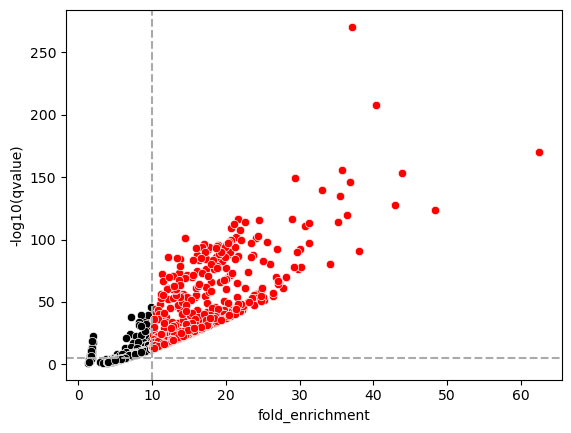

In [24]:
fig, ax = plt.subplots()

sns.scatterplot(x=taz_1['fold_enrichment'],
                y=taz_1['-log10(qvalue)'],
                c='k'
               )

sns.scatterplot(x=taz_1.loc[(taz_1['fold_enrichment'] > 10), 'fold_enrichment'],
                y=taz_1.loc[(taz_1['-log10(qvalue)'] > 5), '-log10(qvalue)'],
                c='r'
               )

plt.axvline(x=10, ls='--', color='#AAAAAA')
plt.axhline(y=5, ls='--', color='#AAAAAA')